# (R) ggplot b

라벨, 주석, 스케일, 축, 눈금, 범례 키, 확대, 축소, 테마

In [98]:
library('tidyverse')
library('ggrepel')
library('viridis')

## 라벨

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



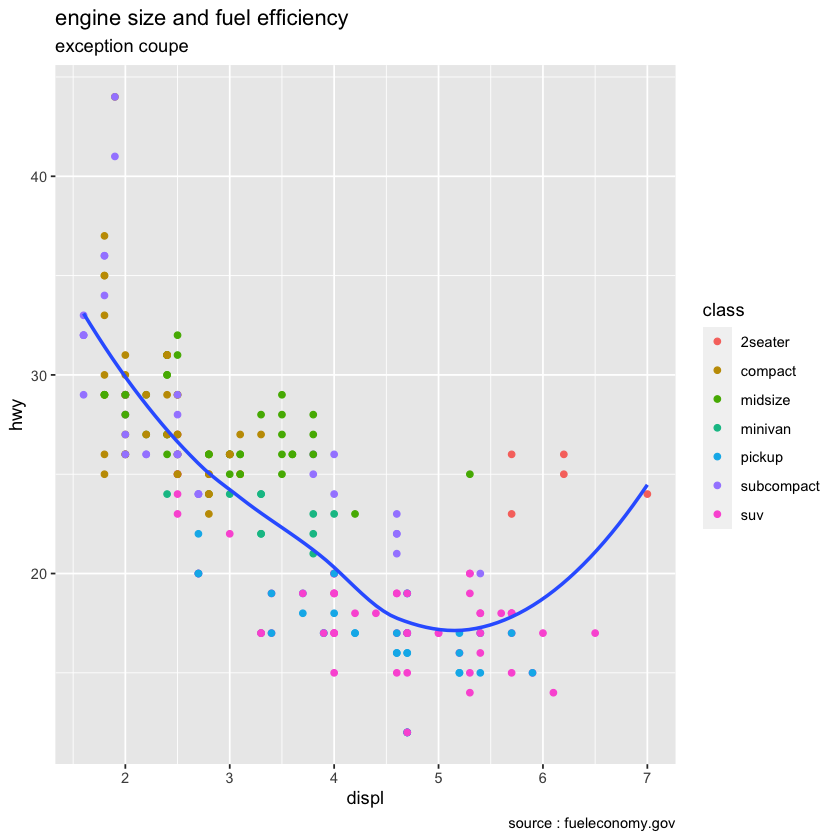

In [99]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_smooth(se = FALSE) +
labs(title = "engine size and fuel efficiency",
     subtitle = "exception coupe",
     caption = "source : fueleconomy.gov"
    )

- 기존의 지정된 것을 변경도 가능

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



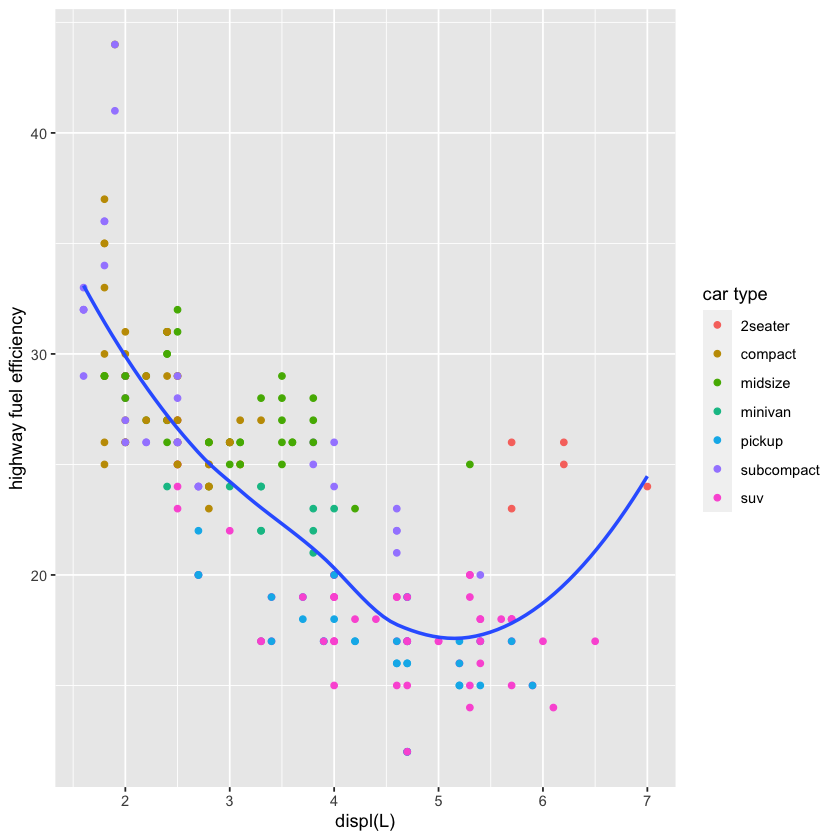

In [100]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_smooth(se = FALSE) +
labs(
    x = "displ(L)",
    y = "highway fuel efficiency",
    color = "car type"
    )

- 텍스트 문자열 대신 수식을 사용할 수 있다. `""`를 `quote()`로 바꾸면 된다.<br>
옵션에 관해서는 `?plotmath`참고

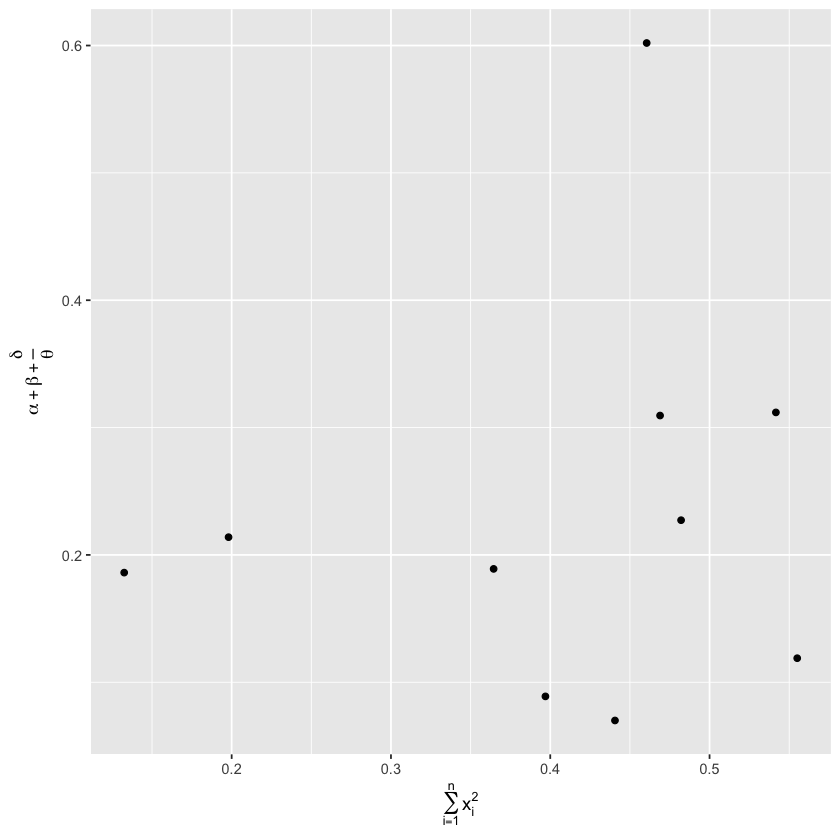

In [101]:
df <- tibble(
    x = runif(10),
    y = runif(10)
    )
ggplot(df, aes(x, y)) +
geom_point() +
labs(
    x = quote(sum(x[i]^2, i== 1, n)),
    y = quote(alpha + beta + frac(delta, theta))
                  )

## 주석

`geom_text()` : 개별 관측값이나 관측값 그룹에 라벨 붙이기

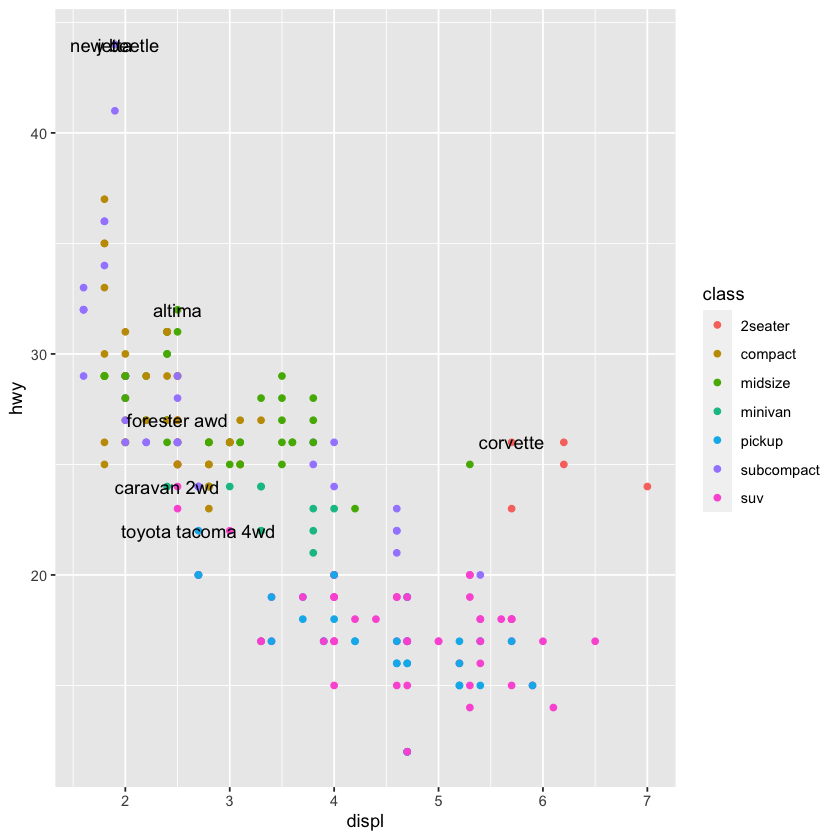

In [102]:
best_in_class <- mpg %>%
group_by(class) %>%
filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_text(aes(label = model), data = best_in_class)

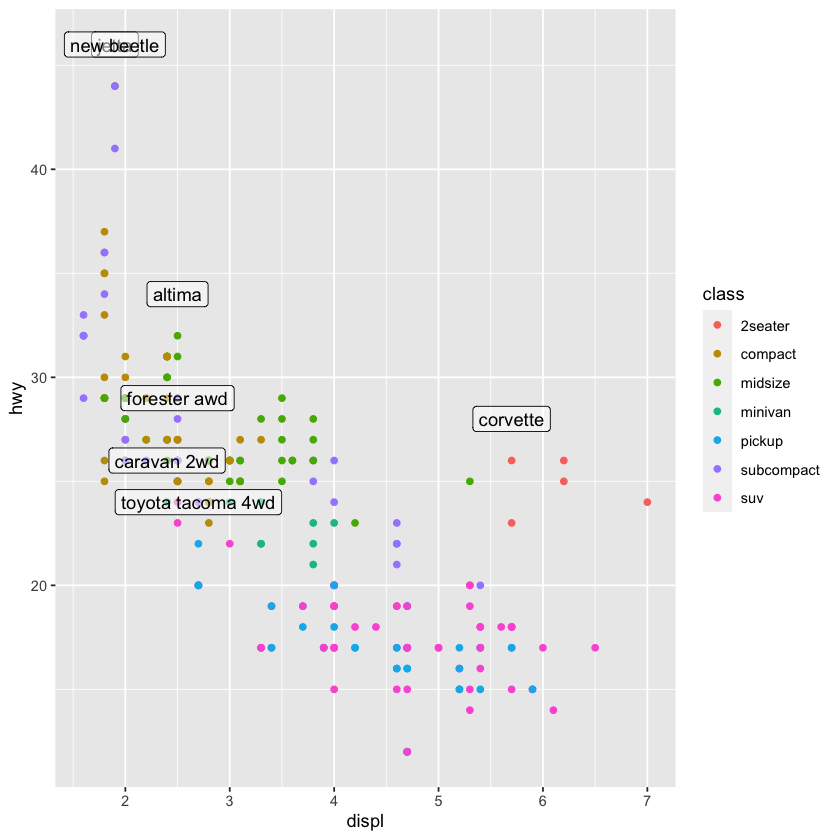

In [103]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_label(
    aes(label = model),
    data = best_in_class,
    nudge_y = 2,
    alpha = 0.5
    )

- 11시 방향에 겹쳐있는 라벨 있음.<br>
소형차와 경차 범주에서 뽑힌 차의 고속도로 연비와 배기량이 정확히 같아서 생긴 문제인데 아래는 해결 방안이다.

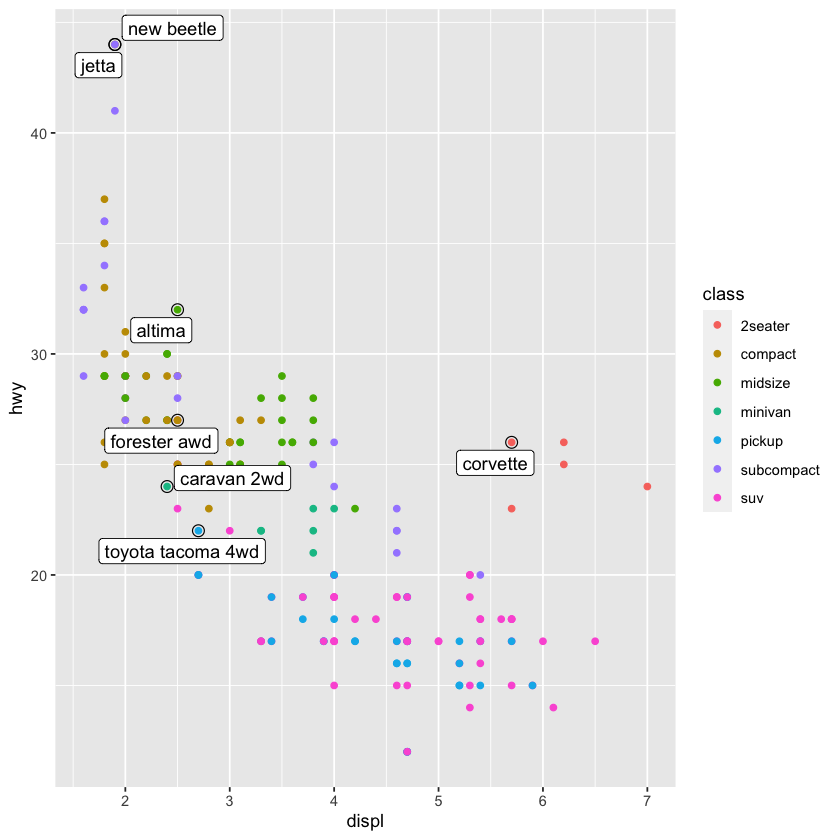

In [104]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_point(size = 3, shape = 1, data = best_in_class) +
ggrepel::geom_label_repel(
    aes(label = model),
    data = best_in_class
    )

- 플롯에 라벨을 직접 위치시켜 범례를 대체하기

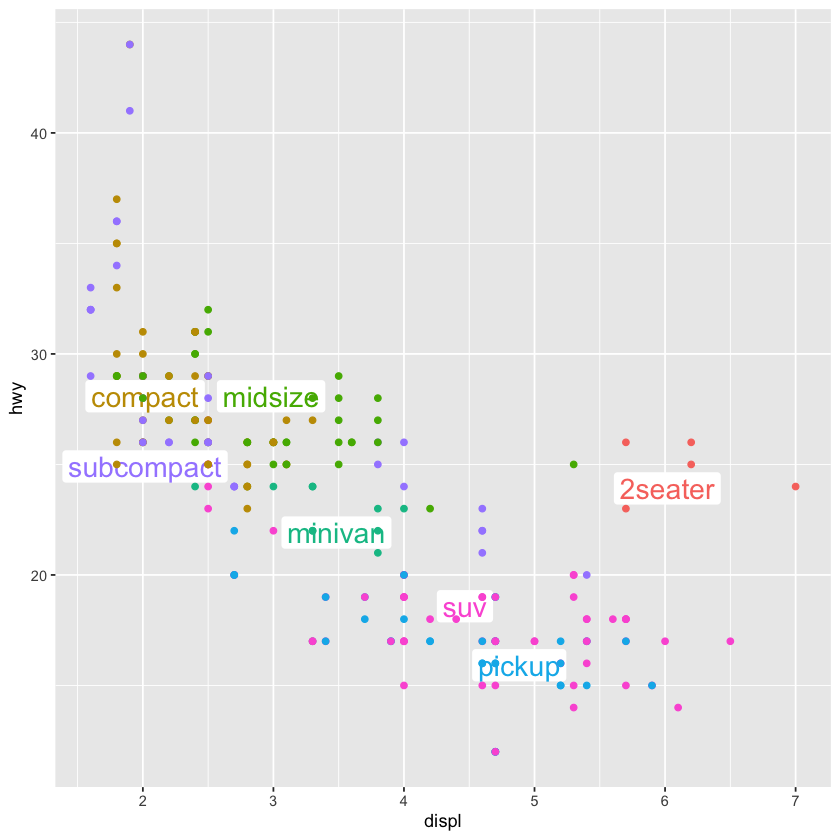

In [105]:
class_avg <- mpg %>%
group_by(class) %>%
summarize(
    displ = median(displ),
    hwy = median(hwy)
    )

ggplot(mpg, aes(displ, hwy, color = class)) +
ggrepel::geom_label_repel(aes(label = class),
                          data = class_avg,
                          size = 6,
                          label.size = 0,
                          segment.color = NA
                          ) +
geom_point() +
theme(legend.position = "none")

- 모퉁이에 라벨 추가

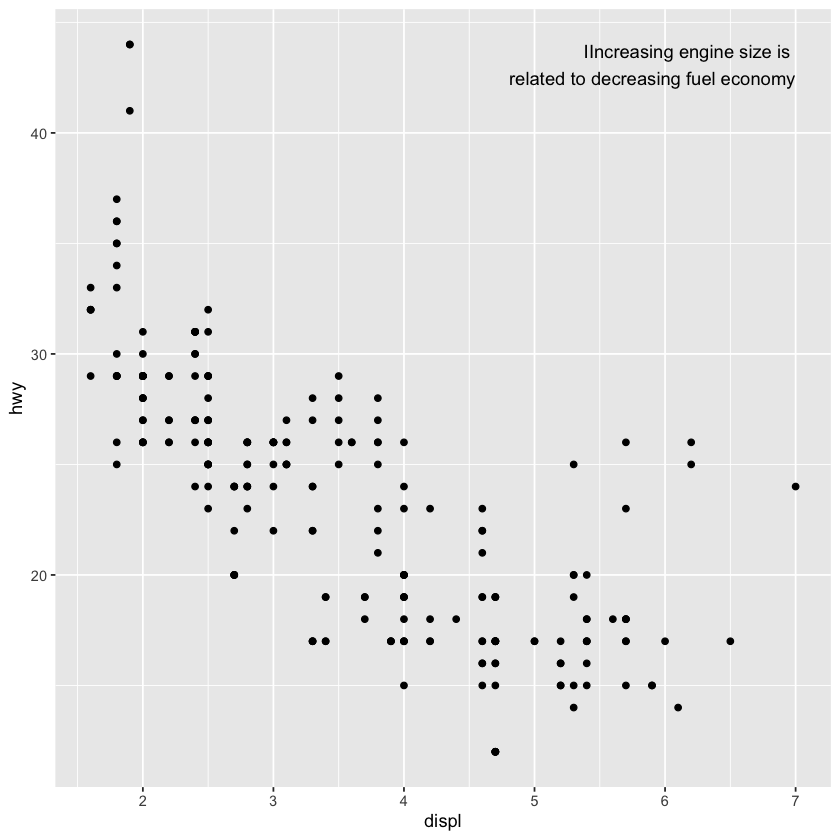

In [106]:
label <- mpg %>%
summarize(
    displ = max(displ),
    hwy = max(hwy),
    label = paste(
        "IIncreasing engine size is \nrelated to decreasing fuel economy"
        )
    )

ggplot(mpg, aes(displ, hwy)) +
geom_point() +
geom_text(
    aes(label = label),
    data = label,
    vjust = "top",
    hjust = "right"
    )

- 텍스트를 플롯의 테두리에 정확하게 배치하려면 +Inf와 -Inf를 사용한다.<br>
mpg에서 위치를 더는 계산하지 않으므로 tibble()을 사용하여 데이터프레임을 만들 수 있다.

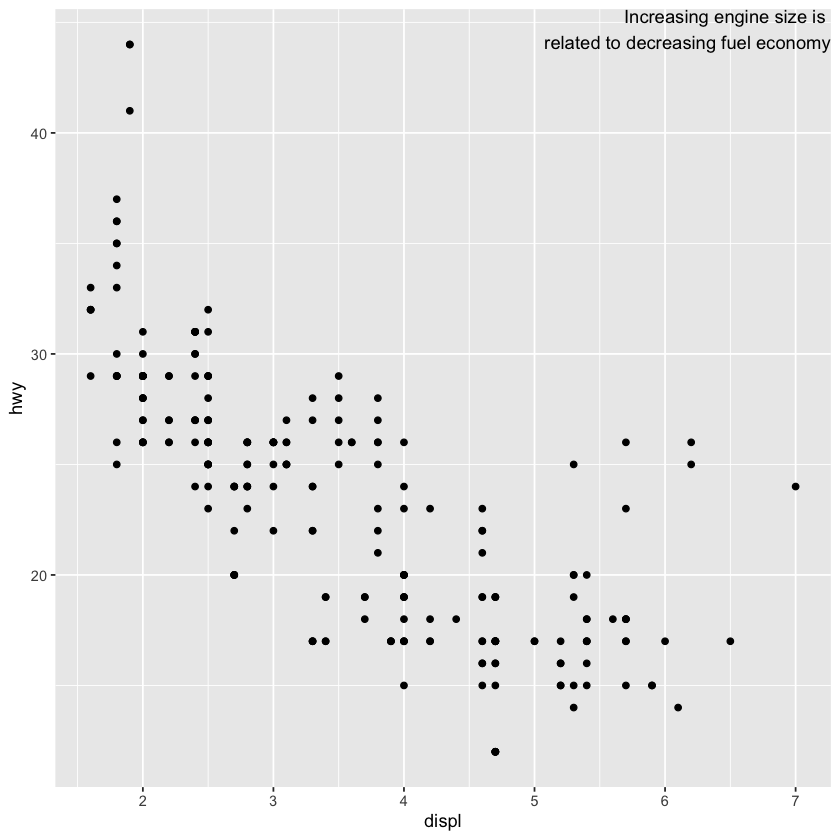

In [107]:
label <- tibble(
    displ = Inf,
    hwy = Inf,
    label = paste(
        "Increasing engine size is \nrelated to",
        "decreasing fuel economy"
        )
    )

ggplot(mpg, aes(displ, hwy)) +
geom_point() +
geom_text(
    aes(label = label),
    data = label,
    vjust = "top",
    hjust = "right"
    )

- 여기서는 `\n`을 사용하여 라벨을 수동을 줄바꿈했는데 다른 방법으로<br>
`stringr::str_wrap()`을 사용하여 한 줄에 원하는 문자 수만큼 줄바꿈을 자동으로 추가한다.

In [108]:
"Increasing engine size is related to decreasing fuel economy." %>%
stringr::str_wrap(width = 40) %>%
writeLines()

Increasing engine size is related to
decreasing fuel economy.


- `geom_text()`이외의 플롯에 주석을 달 수 있는 여러 옵션

> 1) `geom_hline()`, `geom_vline()`을 사용하여 참조선을 추가한다.<br>
참조선을 두껍게(size = 2), 흰색(color = white)으로 만들어 기본 데이터 레이어 아래에 그린다.<br>
이렇게 하면 데이터로부터 시선을 빼앗지 않고도 쉽게 눈에 띈다.<br>
2) `geom_rect()`를 사용하여 관심 지점 주위에 사각형을 그린다. 직사각형의 경계는 xmin, xmax, ymin, ymax 심미성으로 정의된다.<br>
3) `geom_segment()`를 arrow 인수와 함께 사용하여 화살표로 점에 주의를 집중시킨다.<br> 
x와 y 심미성을 사용하여 시작 위치를 정의하고 xend와 yend로 끝 위치를 정의한다.

## 스케일

- 의사소통을 위해 플롯을 더 잘 만들 수 있는 세 번째 방법은 스케일을 조정하는 것이다. 스케일은 데이터 값에서 인식할 수 있는 것으로의 매핑을 조정한다.<br>
일반적으로, ggplot2는 자동으로 스케일을 추가한다.

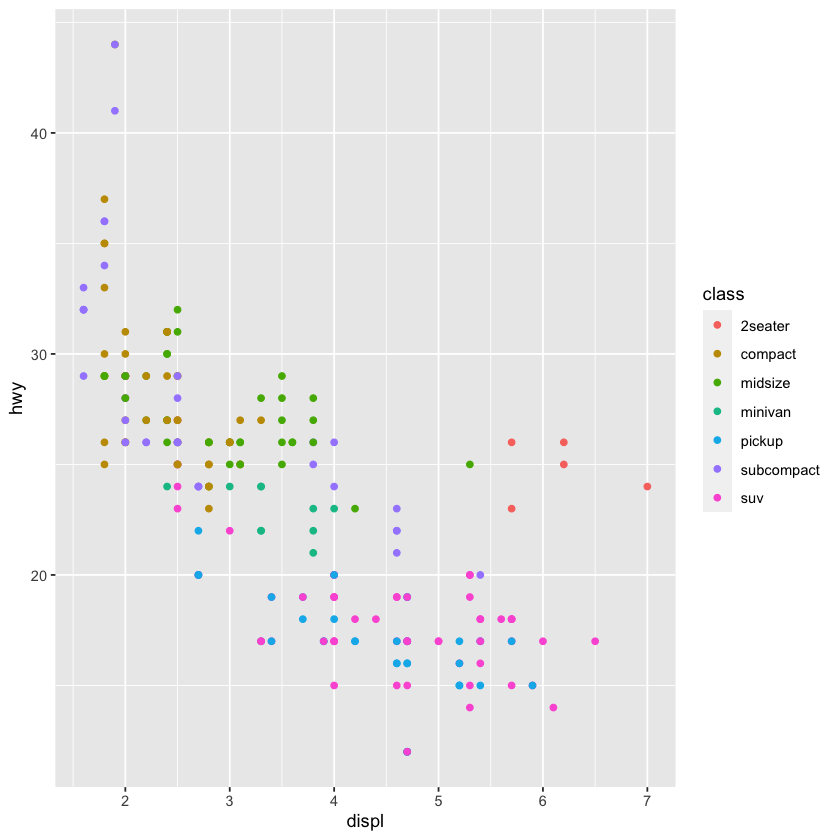

In [109]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class))

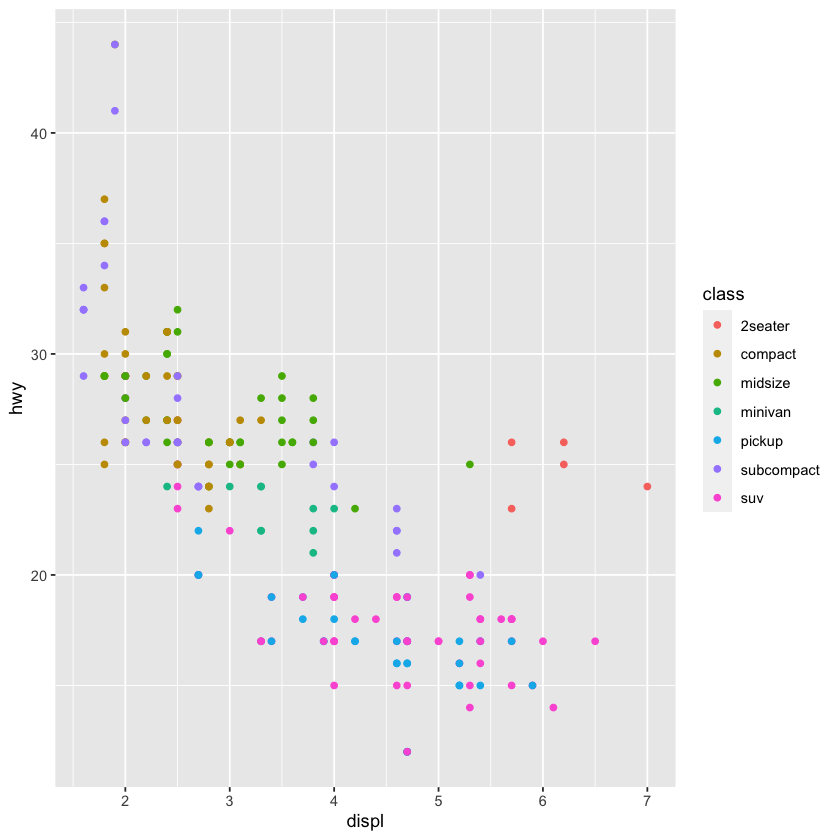

In [110]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
scale_x_continuous() +
scale_y_continuous() +
scale_color_discrete()

- 스케일의 명명 규칙을 주목해야한다. sclale_ 다음에 심미성의 이름, 그다음 _, 그다음엔 스케일의 이름이 온다.<br>
기본 스케일은 정렬되는 변수의 유형(연속형(continuous), 이산형(discrete), 데이트-타임형(date-time), 데이트형(date))에 따라 명명된다.<br>
기본 스케일은 다양한 입력에 맞추어 잘 작동하도록 신중하게 선택되었다. 그럼에도 불구하고 두 가지 이유로 기본값을 덮어쓰고자 할 것이다.<br>
<br>
- 기본 스케일의 파라미터 일부를 조정하고자 할 수 있다. 이렇게 하면 축의 눈금이나 범례의 키 라벨을 바꾸는 것과 같은 일을 할 수 있다.<br>
- 스케일을 완전히 대체하고 완전히 다른 알고리즘을 사용하고자 할 수 있다.<br>
데이터에 대해 더 많이 알고 있기 때문에 기본값보다 더 잘 할 수 있는 경우가 종종 있다.

## 축, 눈금, 범례 키

- 축의 눈금(tick)과 범례의 키 모양에 영향을 주는 두 가지 주요 인수는 breaks와 labels이다. breaks는 눈금의 위치 또는 키와 관련된 값을 제어한다.<br>
labels는 각 눈금.키와 연관된 텍스트 라벨을 제어한다. breaks는 기본 선택을 무시하는 데 가장 일반적으로 사용된다.

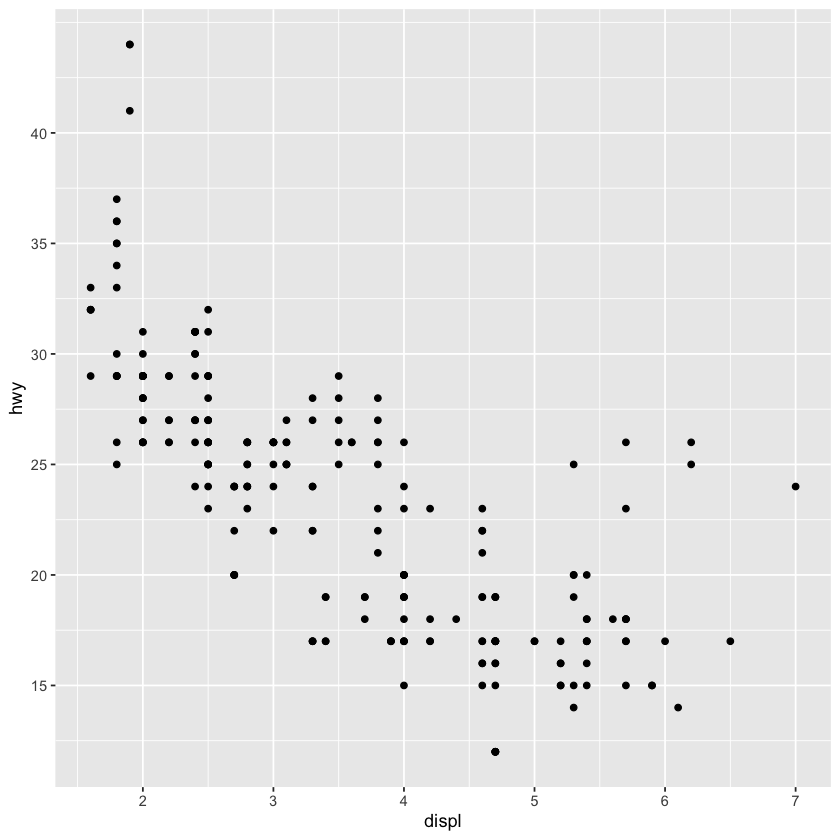

In [111]:
ggplot(mpg, aes(displ, hwy)) +
geom_point() +
scale_y_continuous(breaks = seq(15, 40, by = 5))

- labels를 같은 방법으로 사용할 수 있지만(breaks와 같은 길이의 문자형 벡터) NULL로 설정하여 라벨을 모두 표시하지 않을 수도 있다.<br>
지도 또는 절대 숫자를 공유할 수 없는 플롯을 그릴 때 유용하다.

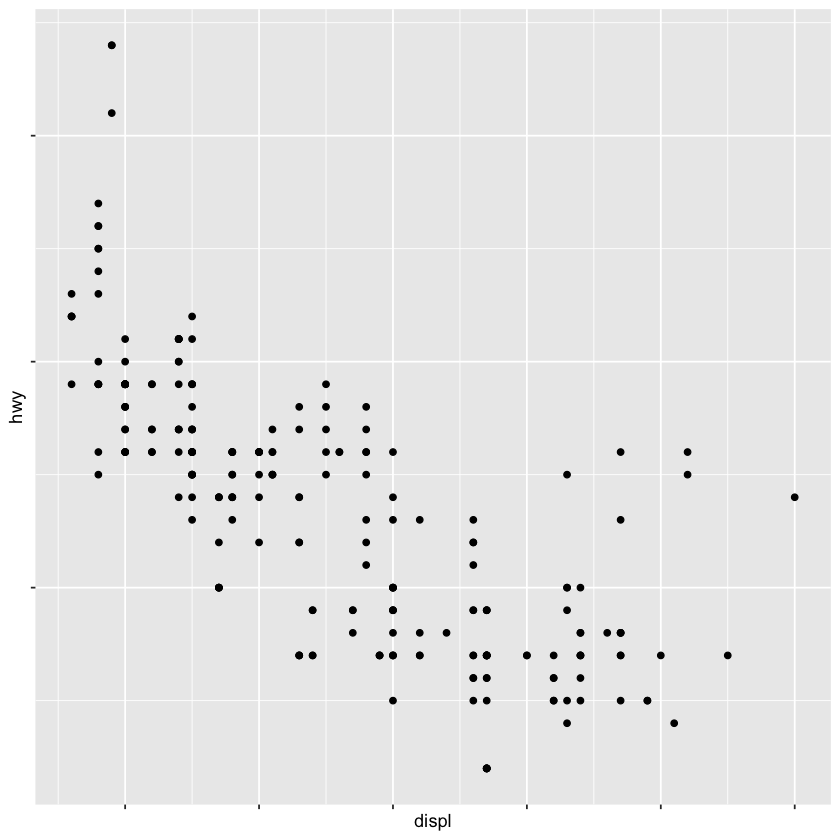

In [112]:
ggplot(mpg, aes(displ, hwy)) +
geom_point() +
scale_x_continuous(labels = NULL) +
scale_y_continuous(labels = NULL)

- breaks와 labels를 사용하여 범례의 외관을 조정할 수도 있다. 축과 범례를 가이드라고 부른다. 축은 x와 y의 심미성에 사용되고, 범례는 다른 모든 것에 사용된다.<br>
데이터 포인트가 상대적으로 적은 경우 관측값이 발생한 정확한 위치를 강조하고 싶을 때도 breaks를 사용할 수 있다.<br>

`-` 예를 들어 각 미국 대통령의 임기가 시작하고 끝난 때를 보여주는 다음의 플롯을 보면

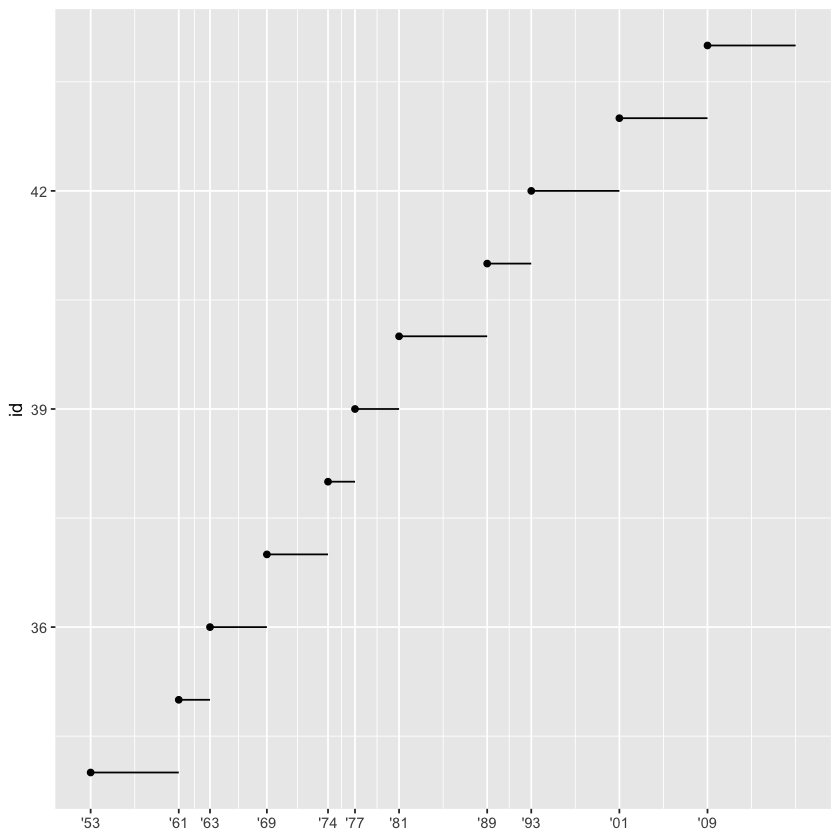

In [113]:
presidential %>%
mutate(id = 33 + row_number()) %>%
ggplot(aes(start, id)) +
geom_point() +
geom_segment(aes(xend = end, yend = id)) +
scale_x_date(
    NULL,
    breaks = presidential$start,
    date_labels = "'%y"
    )

- 데이트형과 데이트-타임형의 breaks와 labels의 명세가 약간 다른 것을 주의해야한다.<br>
<br>
- date_labels는 parse_datetime()과 같은 형식으로 형식지정을 사용한다.<br>
- (여기에 사용되지 않은)date_breaks는 '2일'이나 '1개월'과 같은 문자열을 받아들인다.

## 범례 레이아웃

- 축을 조정하는데 breaks와 labels를 가장 자주 이용할 것인데 이 둘은 범례에도 적용할 수 있지만, 사용하기 쉬운 다른 기술 몇 가지가 있다.<br>
범례의 전체 위치를 제어하려면 `theme()`설정을 사용해야 한다.<br>
이 장의 마지막 부분에서 다시 돌아와 테마를 보겠지만 간단히 말하면, 이는 플롯의 데이터가 아닌 부분을 조정한다.<br>
`legend.position theme`설정은 범례가 배치될 위치를 조정한다.

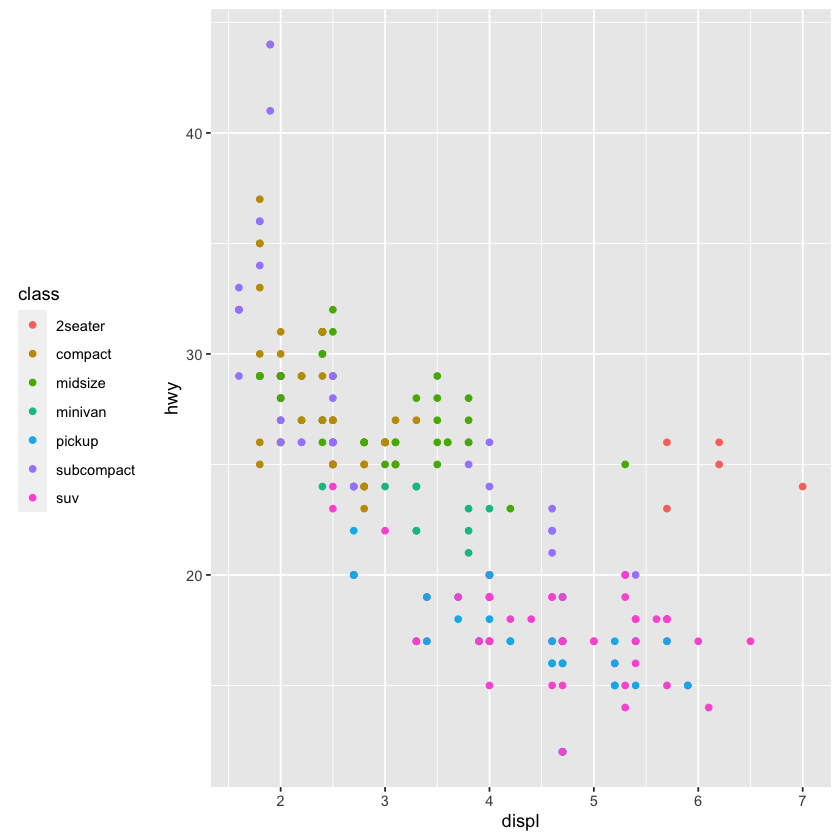

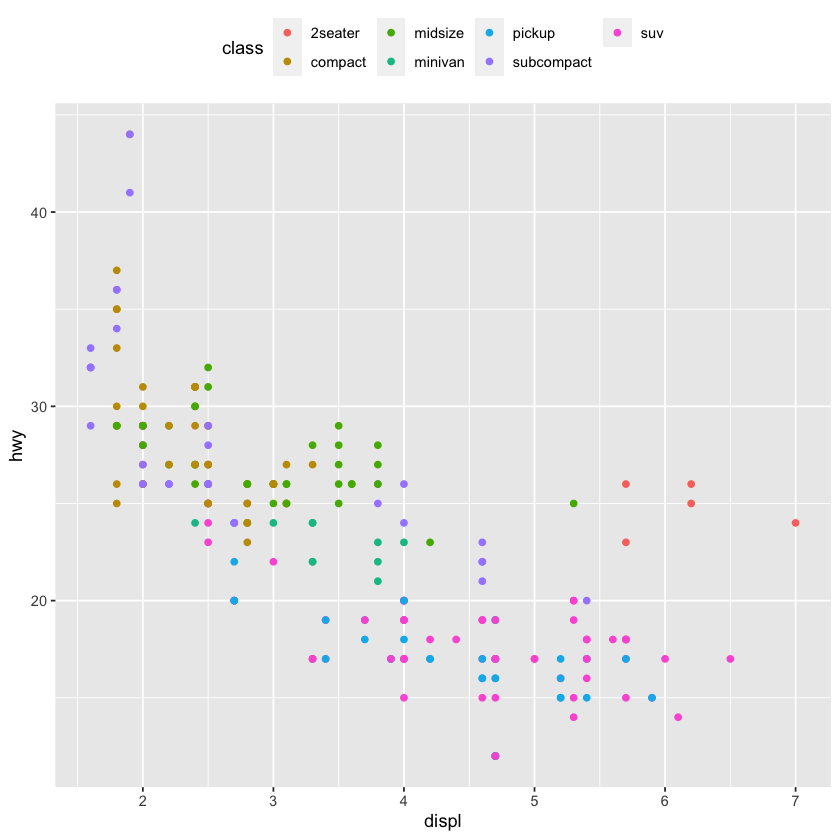

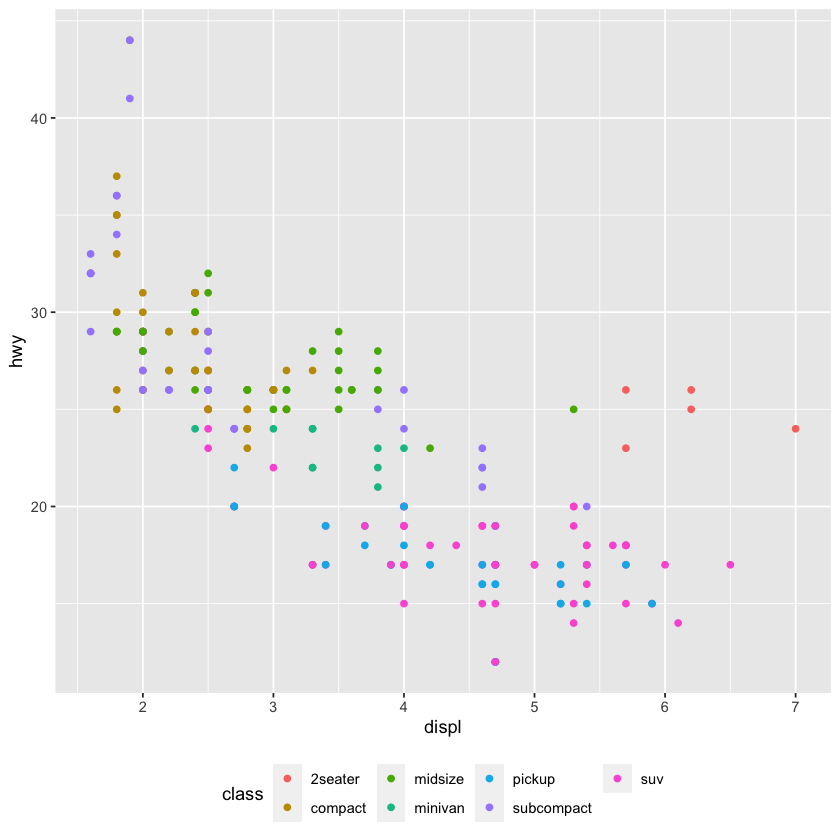

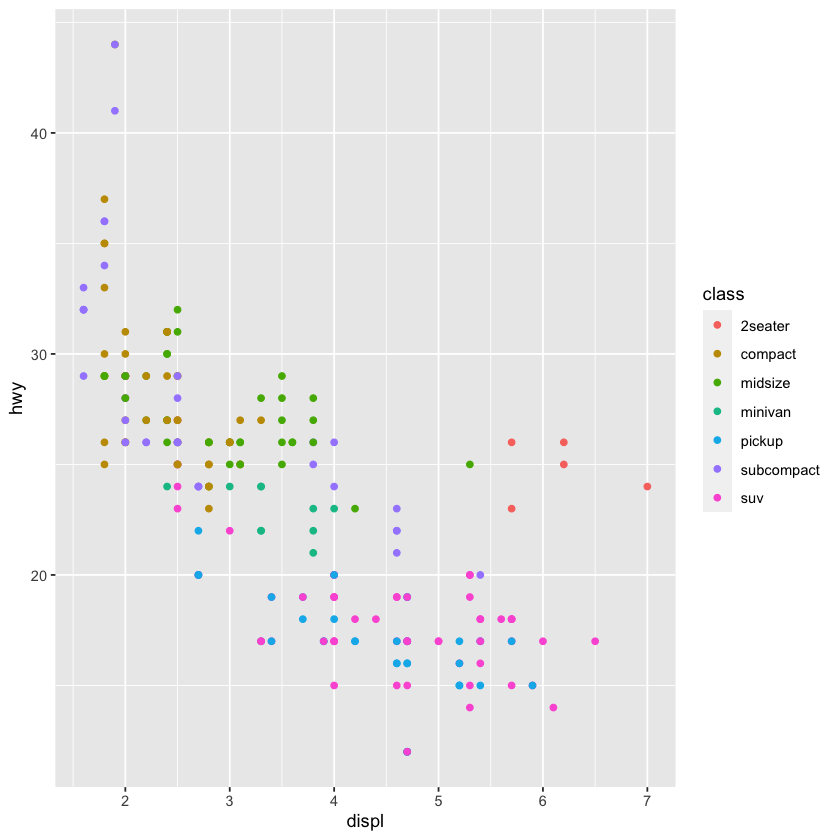

In [114]:
base <- ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class))

base + theme(legend.position = "left")
base + theme(legend.position = "top")
base + theme(legend.position = "bottom")
base + theme(legend.position = "right")

- `legend.position = "none"`을 사용하여 범례 표시를 모두 취소할 수도 있다.<br>
개별 범례 표시를 제어하려면 `guide_legend()`나 `guide_colorbar()`와 함께 `guides()`를 사용하면 된다.<br>

`-` 다음 예제에서는 nrow로 범례가 사용하는 열의 개수를 조정하는 것과 점을 크게 하기 위해 심미성 하나를 재정의하는 것을 보여준다.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



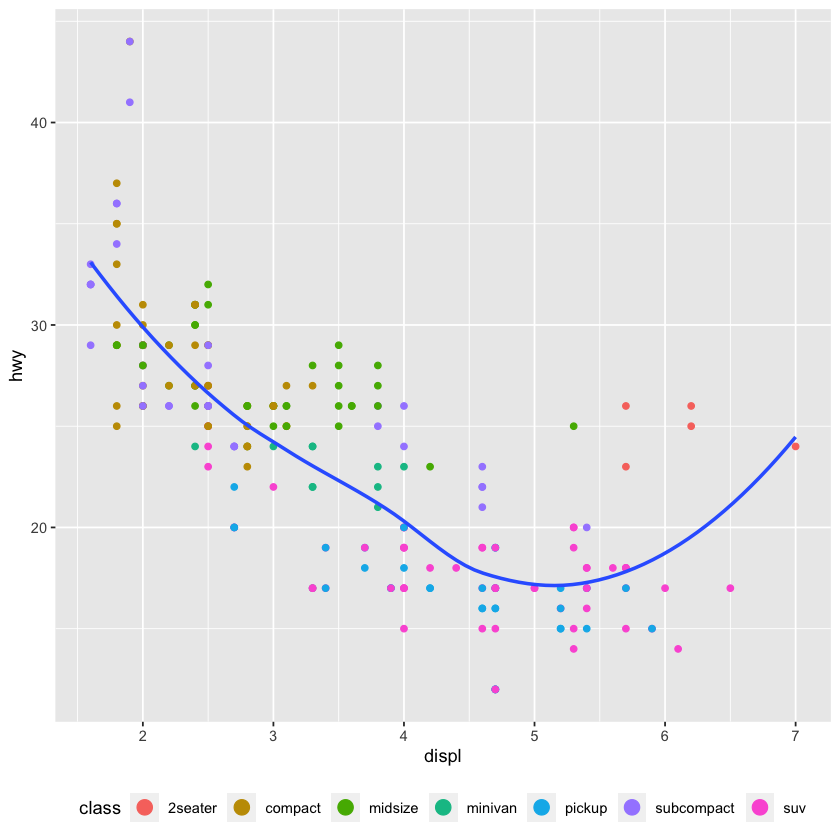

In [115]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_smooth(se = FALSE) +
theme(legend.position = "bottom") +
guides(
    color = guide_legend(
        nrow = 1,
        override.aes = list(size = 4)
        )
    )

## 스케일 교체하기

- 세부사항을 조금만 조정하는 대신 스케일을 모두 교체할 수 있다. 자주 교체되는 두 가지 유형의 스케일은 연속형 위치 스케일과 색상 스케일이다. 다행히도 다른 
모든 심미성에 같은 원칙이 적용되므로 위치와 색상을 배우면 다른 스케일 대체물을 신속하게 이해할 수 있다. 

`-` 다이아몬드 예제<br>
- 변수를 변형 후 플롯하면 매우 유용한데 아래에서 보면 `carat`과 `price`를 로그 변환하면 이들의 정확한 관계를 확인하기 쉽다.

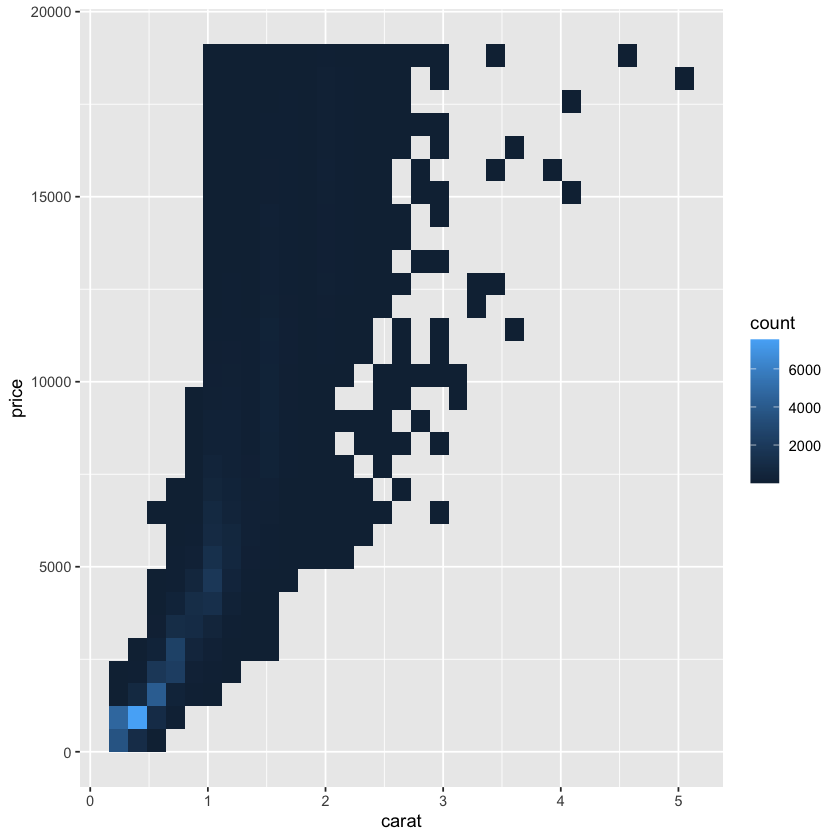

In [116]:
ggplot(diamonds, aes(carat, price)) +
geom_bin2d()

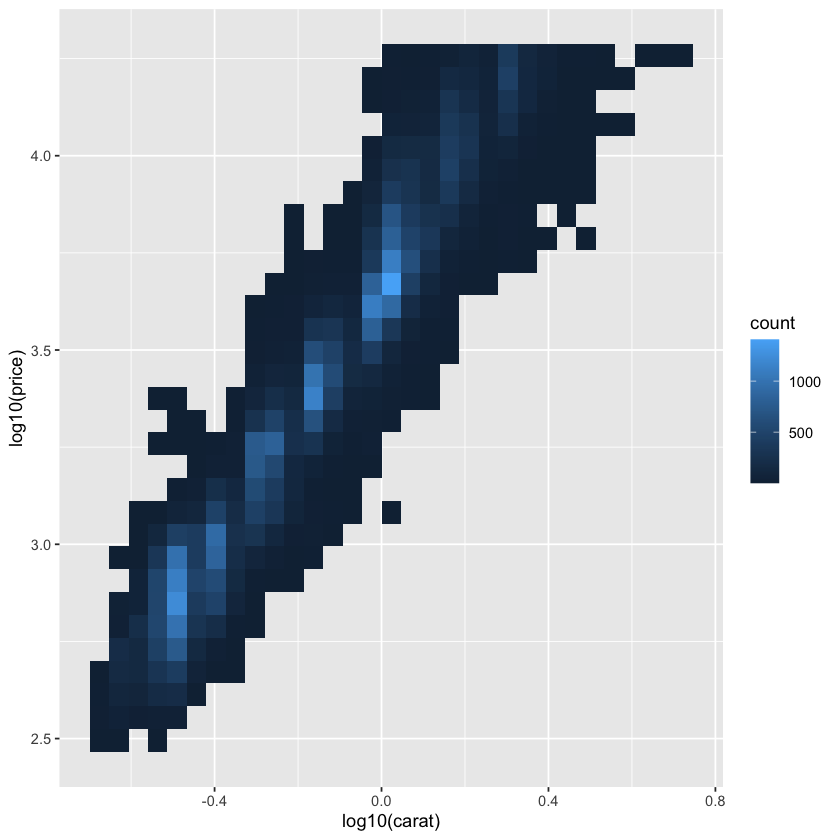

In [117]:
ggplot(diamonds, aes(log10(carat), log10(price))) +
geom_bin2d()

- 그러나 이 변환의 단점이 있는데, 축의 라벨이 변환된 값으로 지정되어 플롯을 해석하기 어렵게 된다.<br>
변환을 심미성 매핑에서 수행하는 대신, 스케일을 이용해서 할 수 있는데 이 방법은 축이 원래 데이터 스케일로 라벨링된다는 점을 제외하고는 시각적으로 동일하다.

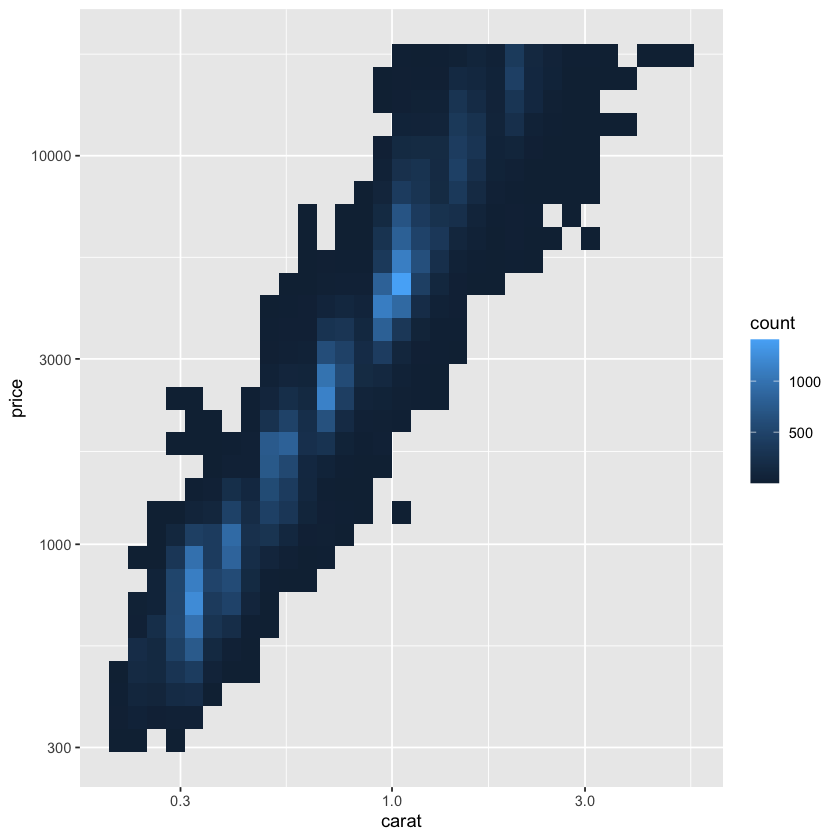

In [118]:
ggplot(diamonds, aes(carat, price)) +
geom_bin2d() +
scale_x_log10() +
scale_y_log10()

- 자주 사용자 정의되는 또 다른 스케일은 색상이다. 기본 범주형 스케일에서는 커러휠 주위에 등간격에 위치한 색상이 선택된다.<br>
흔히 나타나는 유형의 색맹인 사람들도 볼 수 있도록 조정된 ColorBrewer 스케일도 유용한 대안이다.

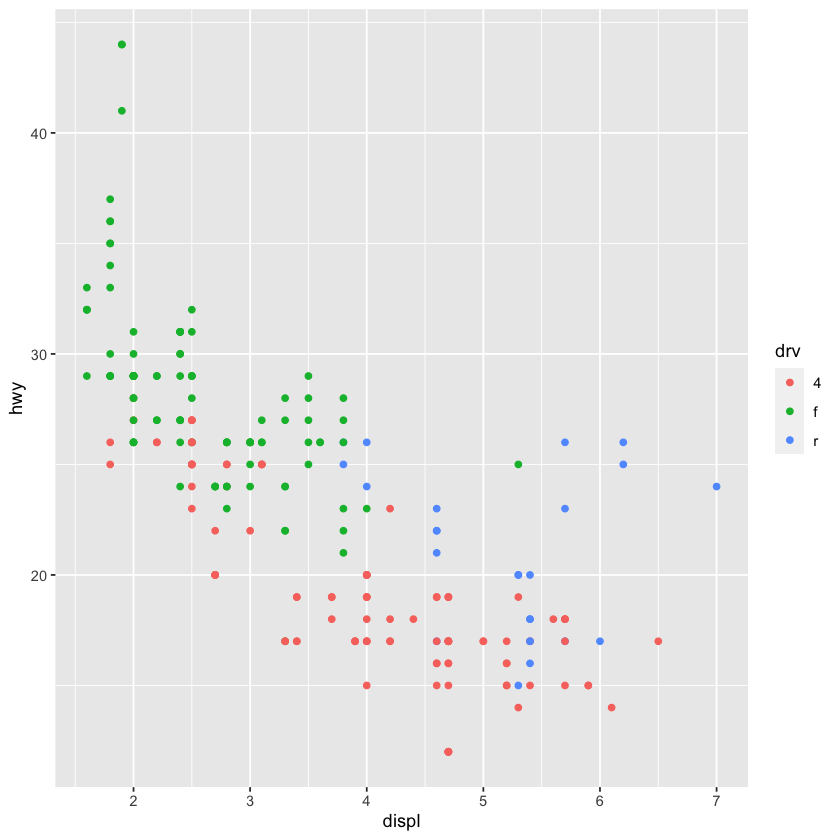

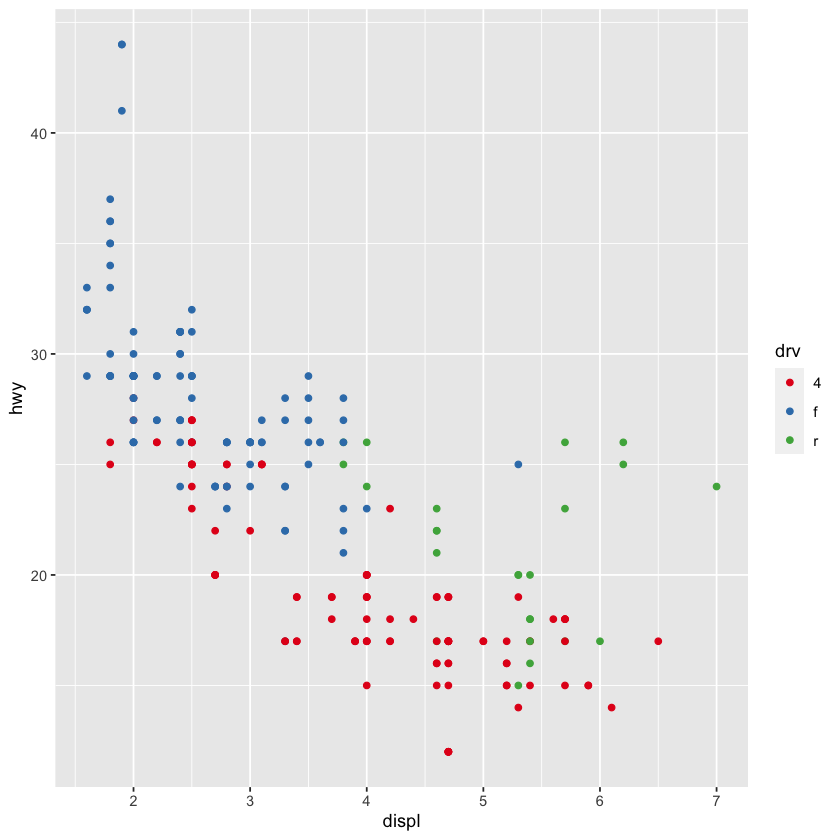

In [119]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = drv))

ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = drv)) +
scale_color_brewer(palette = "Set1")

- 색상의 개수가 많지 않으면 모양(shape) 매핑을 중복 추가할 수 있다. 이 방법은 플롯이 흑백에서도 구분될 수 있도록 도와주기도 한다.

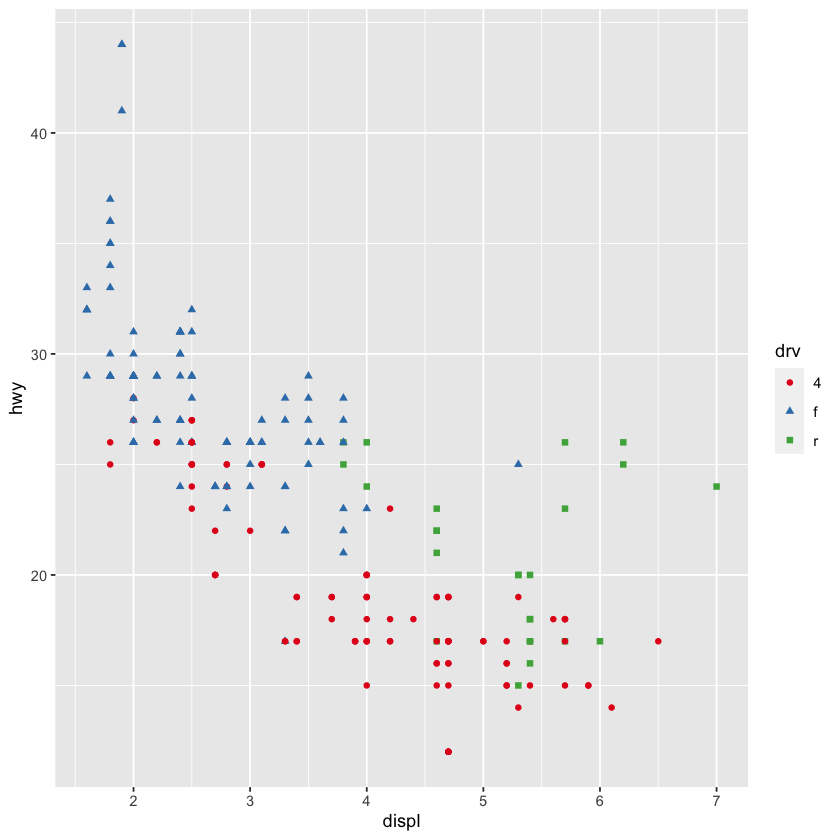

In [120]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = drv, shape = drv)) +
scale_color_brewer(palette = "Set1")

- 위의 `Set1`이라고 적은 곳을 옵션에서 찾아보면 다양한 색 조합 변경가능

`-` 대통령 소속 정당을 색상에 매핑

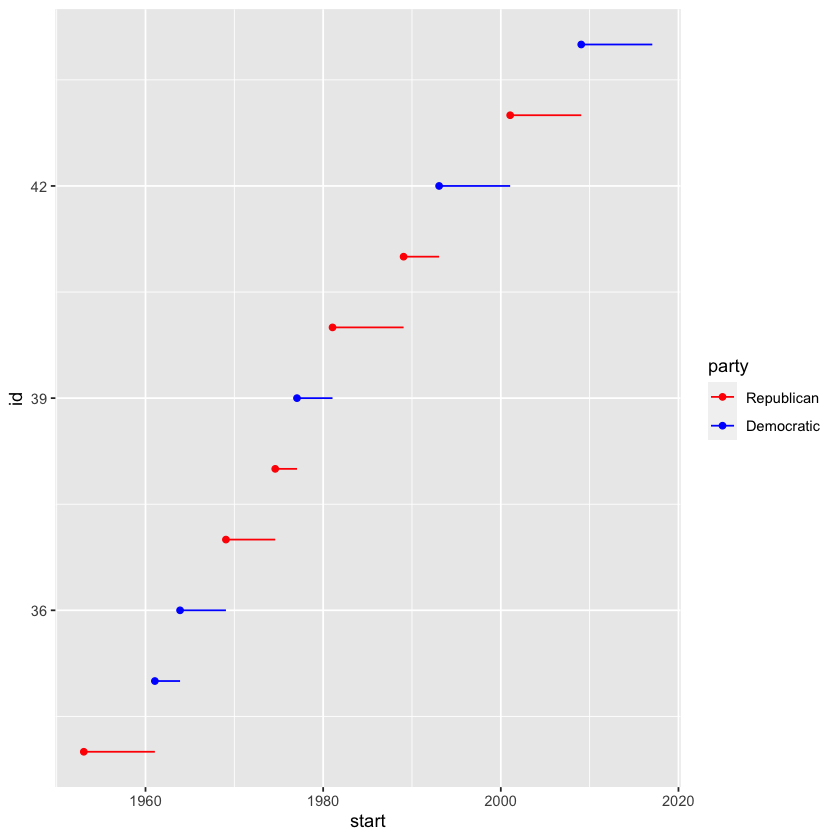

In [121]:
presidential %>%
    mutate(id = 33 + row_number()) %>%
    ggplot(aes(start, id, color = party)) +
        geom_point() +
        geom_segment(aes(xend = end, yend = id)) +
        scale_color_manual(values = c(Republican = "red", Democratic = "blue"))

- 연속형 색상의 경우, 기본적으로 제공된 `scale_color_gradient()`나 `scale_fill_gradient()`를 사용할 수 있다.<br>
발산 스케일이 있다면 `scale_color_gradient2()`를 사용할 수 있다. 이 방법으로, 예를 들어 양수와 음수에 다른 색깔을 줄 수 있다.<br>
이는 평균 이상이나 이하 점을 구분하고자 할 때 사용할 수 있는 유용한 방법이다.

In [122]:
df <- tibble(
    x = rnorm(10000),
    y = rnorm(10000)
    )

Warning message:
“Computation failed in `stat_binhex()`:
”
Warning message:
“Computation failed in `stat_binhex()`:
”


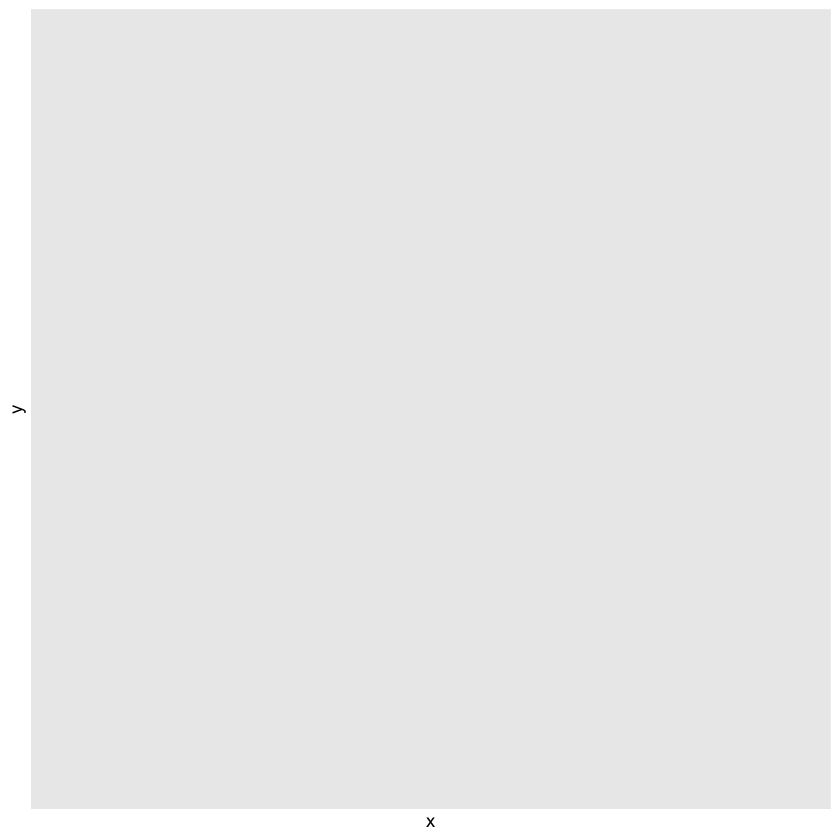

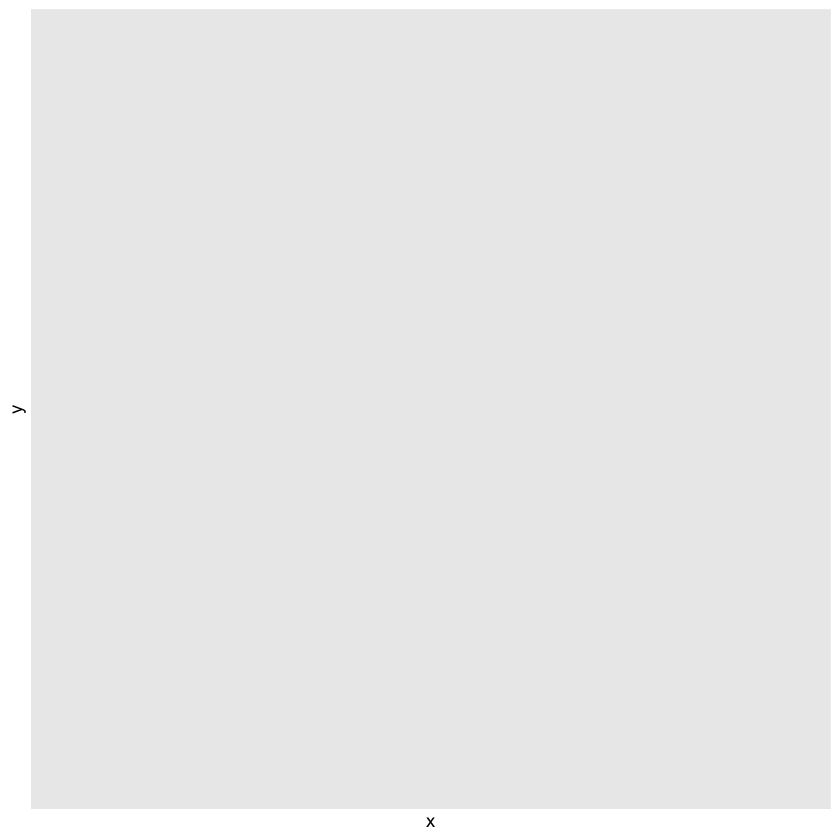

In [123]:
ggplot(df, aes(x, y)) +
geom_hex() +
coord_fixed()

ggplot(df, aes(x, y)) +
geom_hex() +
viridis::scale_fill_viridis() +
coord_fixed()

## 확대.축소

- 플롯 범위를 조정하는 방법은 세 가지가 있다.<br>

1) 플롯할 데이터 조정하기.<br>
2) 각 스케일에서 범위 설정하기.<br>
3) `coord_cartesian()`의 `xlim()`과 `ylim()` 설정하기.

- 플롯 영역을 확대.축소하려면 `coord_cartesian()`을 사용하는 것이 일반적으로 제일 좋다. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



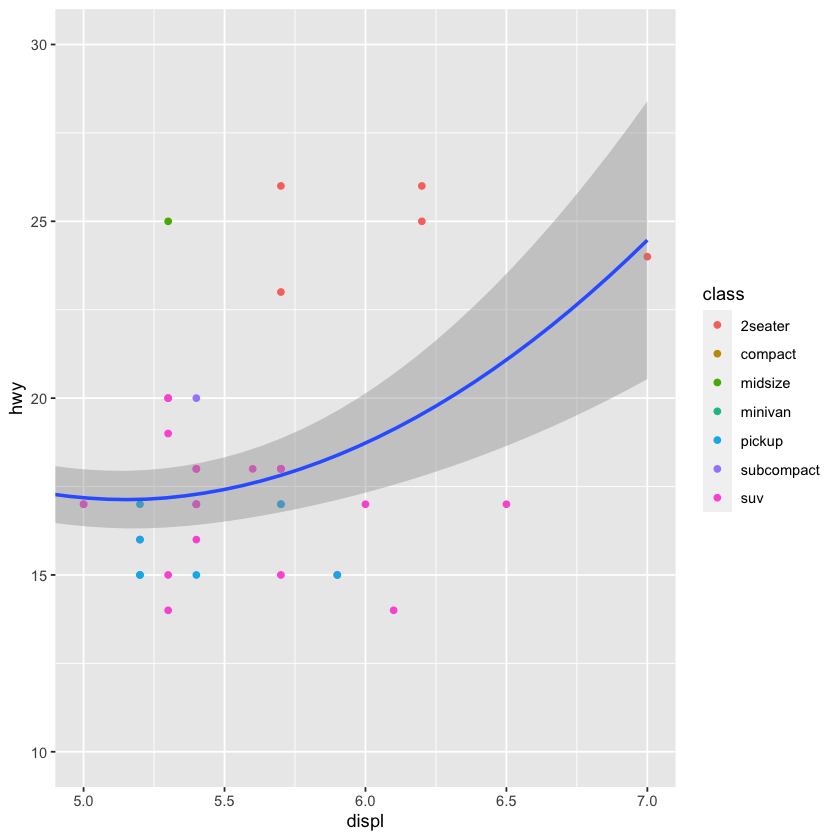

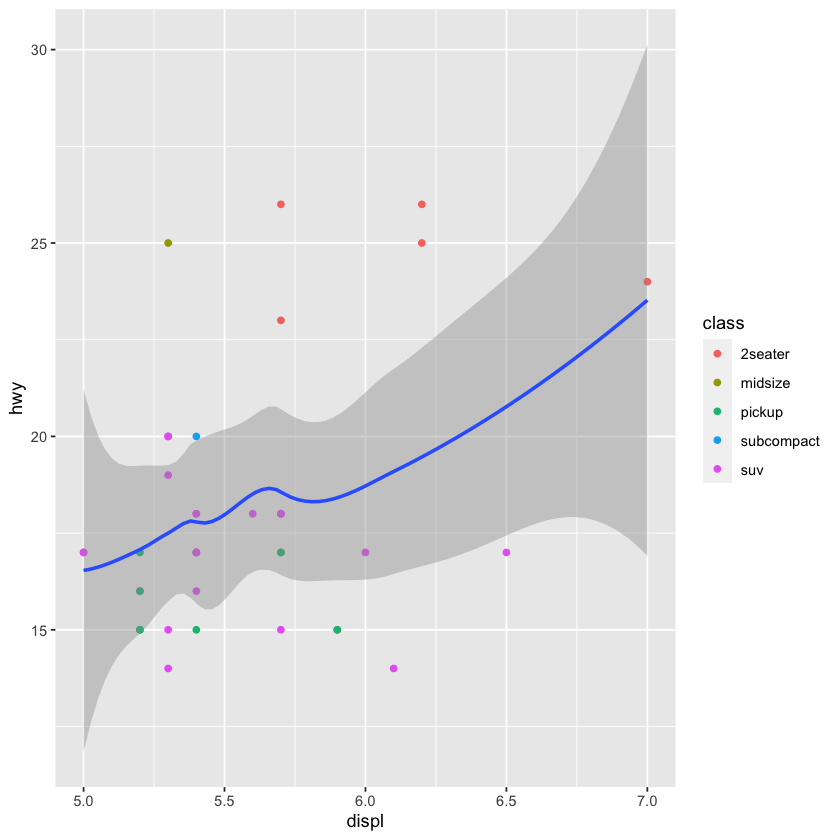

In [124]:
ggplot(mpg, mapping = aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_smooth() +
coord_cartesian(xlim = c(5, 7), ylim = c(10, 30))

mpg %>%
filter(displ >= 5, displ <= 7, hwy >= 10, hwy <= 30) %>%
ggplot(aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_smooth()

- 개별 스케일에 대한 범위를 설정할 수도 있다. 범위를 줄이는 방식은 기본적으로 데이터를 서브셋하는 것과 같다.<br>
플롯들 사이에 스케일을 이치시키는 등의 목적으로 범위를 확장하려는 경우에 일반적으로 유용하다.<br>
예를 들어 두 차종을 추출하여 각각 플롯을 그리면 세가지 스케일(x축, y축, 색상 심미성)의 범위가 서로 다르기 때문에 플롯을 비교하기가 어렵다.

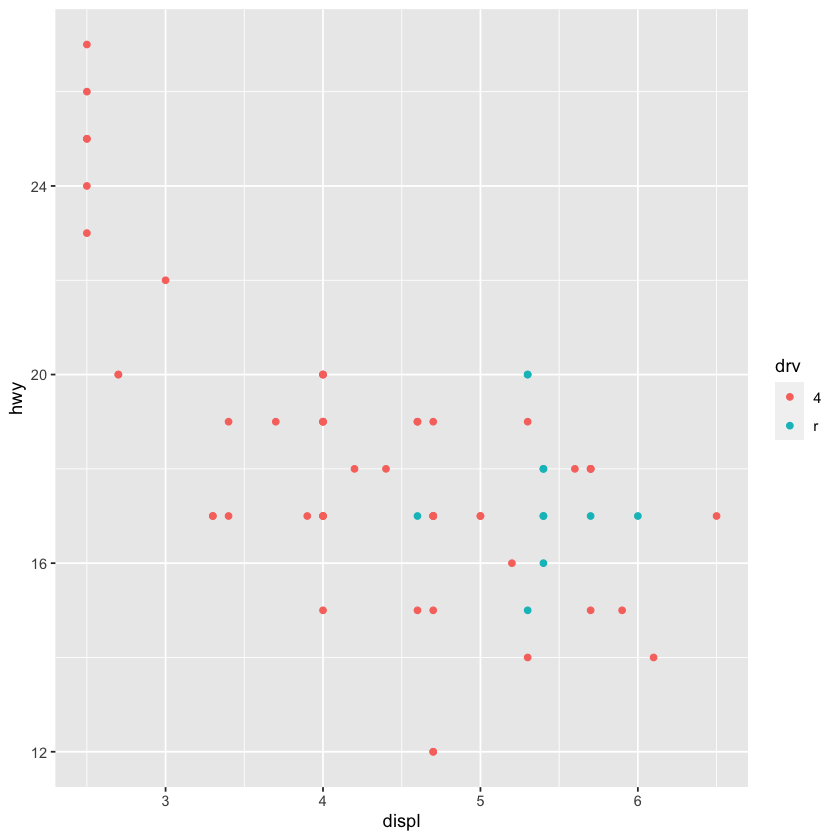

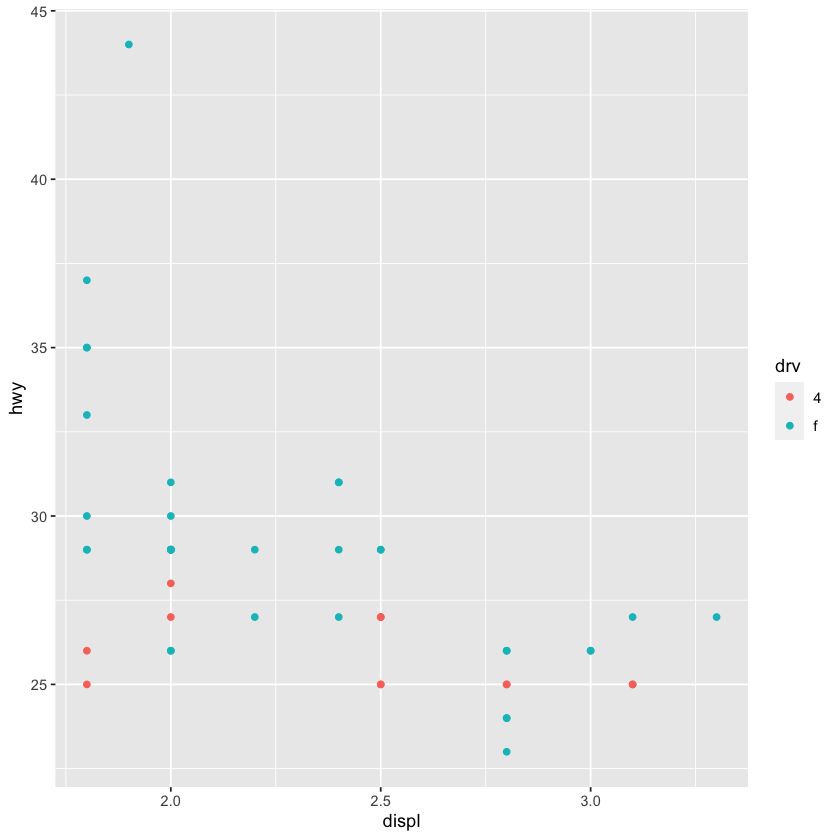

In [125]:
suv <- mpg %>% filter(class == "suv")
compact <- mpg %>% filter(class == "compact")

ggplot(suv, aes(displ, hwy, color = drv)) +
geom_point()

ggplot(compact, aes(displ, hwy, color = drv)) +
geom_point()

- 이 문제를 극복하는 방법 중 하나는, 여러 플롯 사이에 스케일을 공유하고, 전체 데이터의 limits로 스케일을 학습하는 것이다.

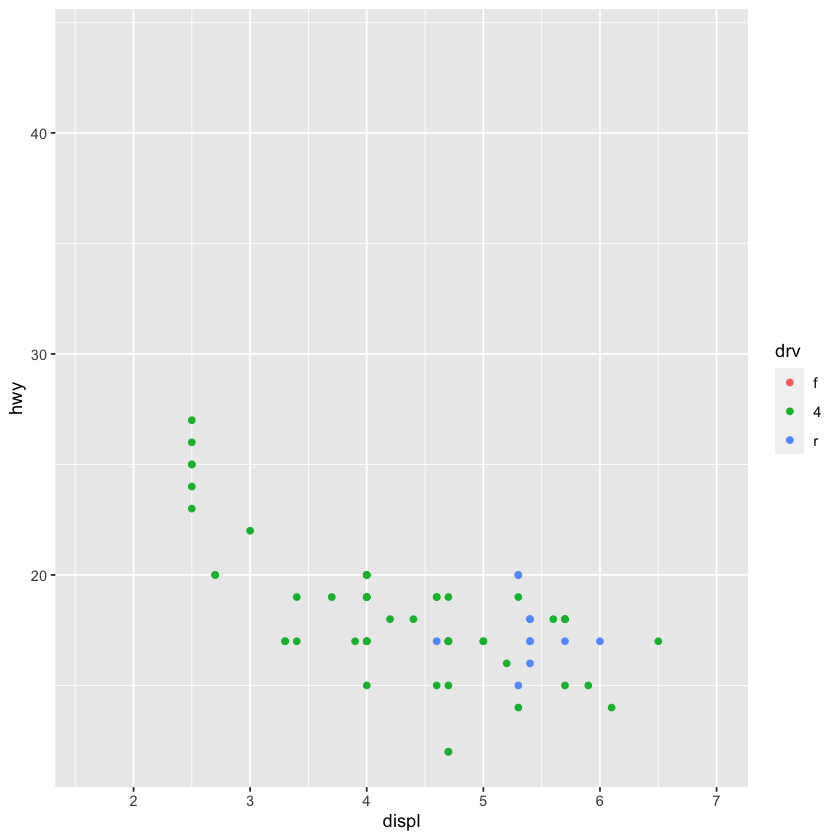

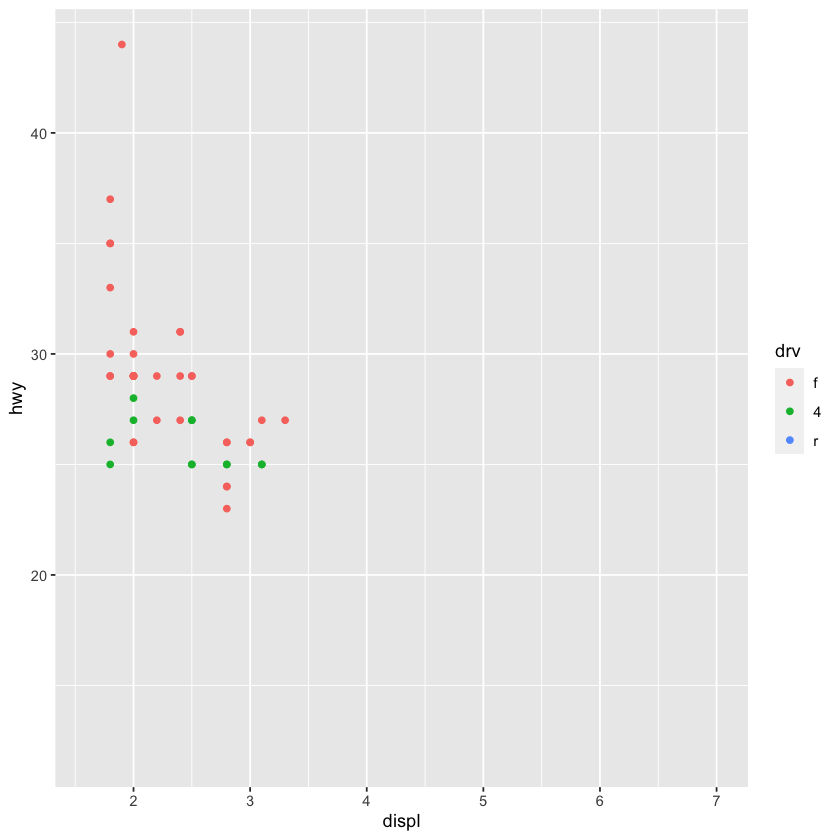

In [126]:
x_scale <- scale_x_continuous(limits = range(mpg$displ))
y_scale <- scale_y_continuous(limits = range(mpg$hwy))
col_scale <- scale_color_discrete(limits =  unique(mpg$drv))

ggplot(suv, aes(displ, hwy, color = drv)) +
geom_point() +
x_scale +
y_scale +
col_scale

ggplot(compact, aes(displ, hwy, color = drv)) +
geom_point() +
x_scale +
y_scale +
col_scale

## 테마

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



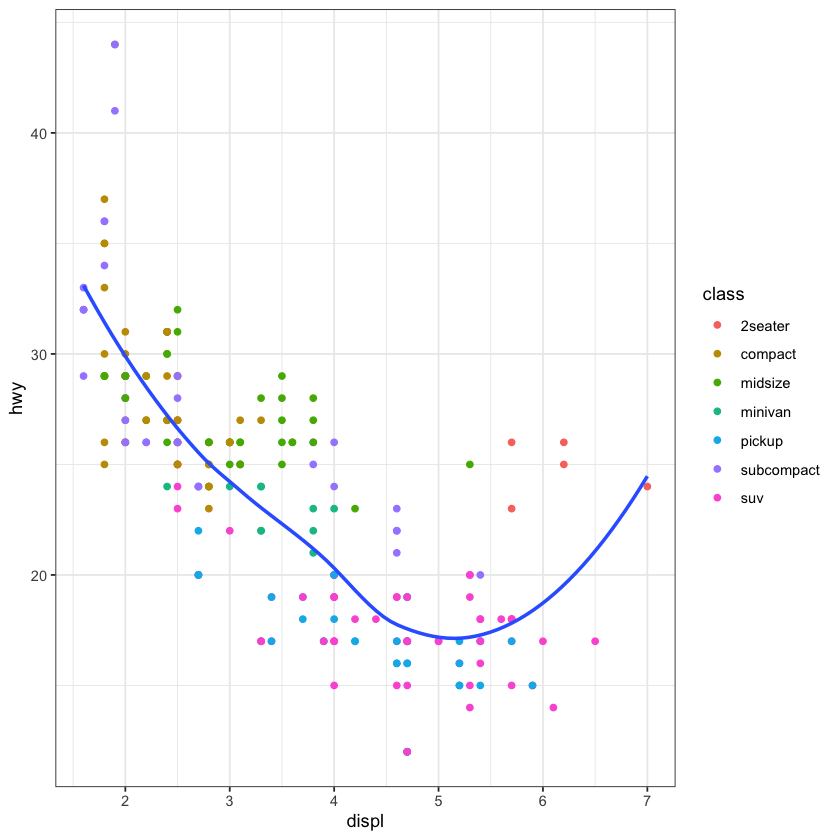

In [127]:
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_smooth(se = FALSE) +
theme_bw()